# Package Import Section

In [1]:
import time
start = time.time()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from memory_profiler import profile

# Reading data from CSV file

In [2]:
data = pd.read_csv('bank-additional-full.csv', sep = ';')
#data.to_excel( "bank.xlsx" )
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [3]:
data.describe(include = 'object') #getting summary of categorical value

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [4]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# Train test split

First we identified the features with unknown values and we have dropped those rows. As 'default' feature has too many unknown later in the pipeline we ignored the feature.

In [5]:
cols = data.columns
num_cols = list(data._get_numeric_data().columns)
cat_col = list(set(cols) - set(num_cols) - set('y'))
cat_col


['default',
 'housing',
 'contact',
 'education',
 'loan',
 'poutcome',
 'day_of_week',
 'marital',
 'job',
 'month']

In [6]:
cat_miss=[]
for i in cat_col:
    if "unknown" in data[i].unique():
        cat_miss.append(i)
cat_miss

['default', 'housing', 'education', 'loan', 'marital', 'job']

In [7]:
data_no_missing = data.loc[(data['education']!='unknown')&(data['marital']!='unknown')&(data['housing']!='unknown')
                        &(data['job']!='unknown')&(data['loan']!='unknown')] 

In [8]:
X = data_no_missing.iloc[:, 0:20]
y = data_no_missing.iloc[:, 20]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
23054,38,admin.,married,university.degree,no,no,no,cellular,aug,tue,178,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1
5288,36,blue-collar,married,basic.6y,no,no,no,telephone,may,fri,189,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
36510,39,admin.,married,university.degree,no,no,no,cellular,jun,wed,2219,1,999,1,failure,-2.9,92.963,-40.8,1.260,5076.2
25250,37,unemployed,single,university.degree,no,yes,no,cellular,nov,tue,135,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8
23216,57,admin.,married,university.degree,unknown,yes,yes,cellular,aug,tue,61,4,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1


We have used random oversampling in the training data to increase the number of samples associated with the target variable 'yes' to get suitable result. As the data is highly imbalanced(the no. of samples with 'yes' is very less compared to 'no'), we have taken this measure. 

Here sampling strategy is 0.5 
It means no. of minority target varible sample('yes') would be 0.5 times of no. of majority target varibale samples('no')

In [10]:
ros = RandomOverSampler(sampling_strategy=0.5,random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Exploratory Data Analysis

First we have plotted bars with respect to the class labels. This confirms that we don't have any unknown values.

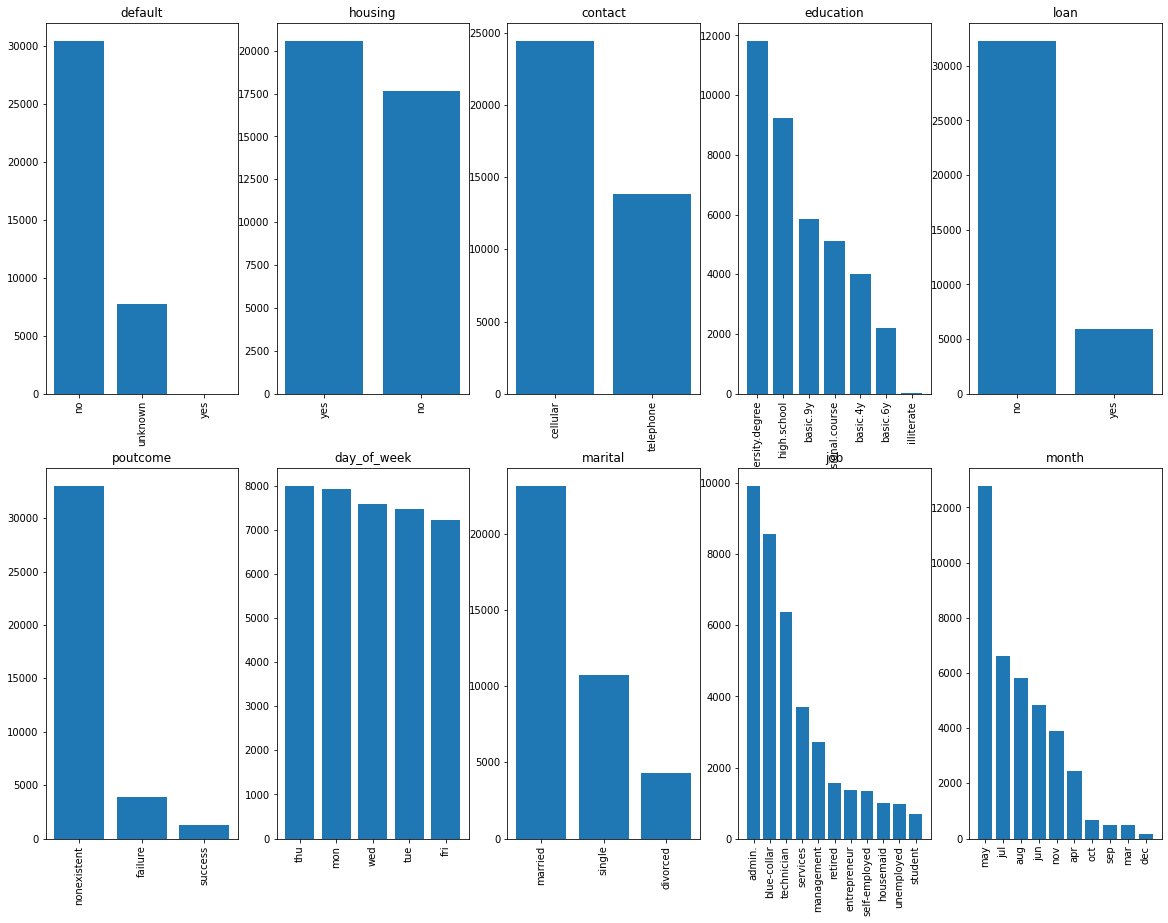

In [11]:
fig , axis = plt.subplots(2, 5, sharex=False, sharey=False, figsize=(20, 15))

flag = 0

for i in cat_col:
    value_counts = data_no_missing[i].value_counts()
    trace_x = flag // 5
    trace_y = flag % 5
    x_pos = np.arange(0, len(value_counts))
    
    axis[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)

    axis[trace_x, trace_y].set_title(i)
    
    for tick in axis[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    flag += 1

plt.show()
    

<AxesSubplot:xlabel='count', ylabel='y'>

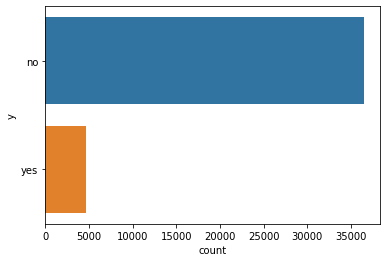

In [12]:
sns.countplot(y = 'y', data = data)

It it highly imbalanced data. 

Now we have done the same with numerical attributes. 

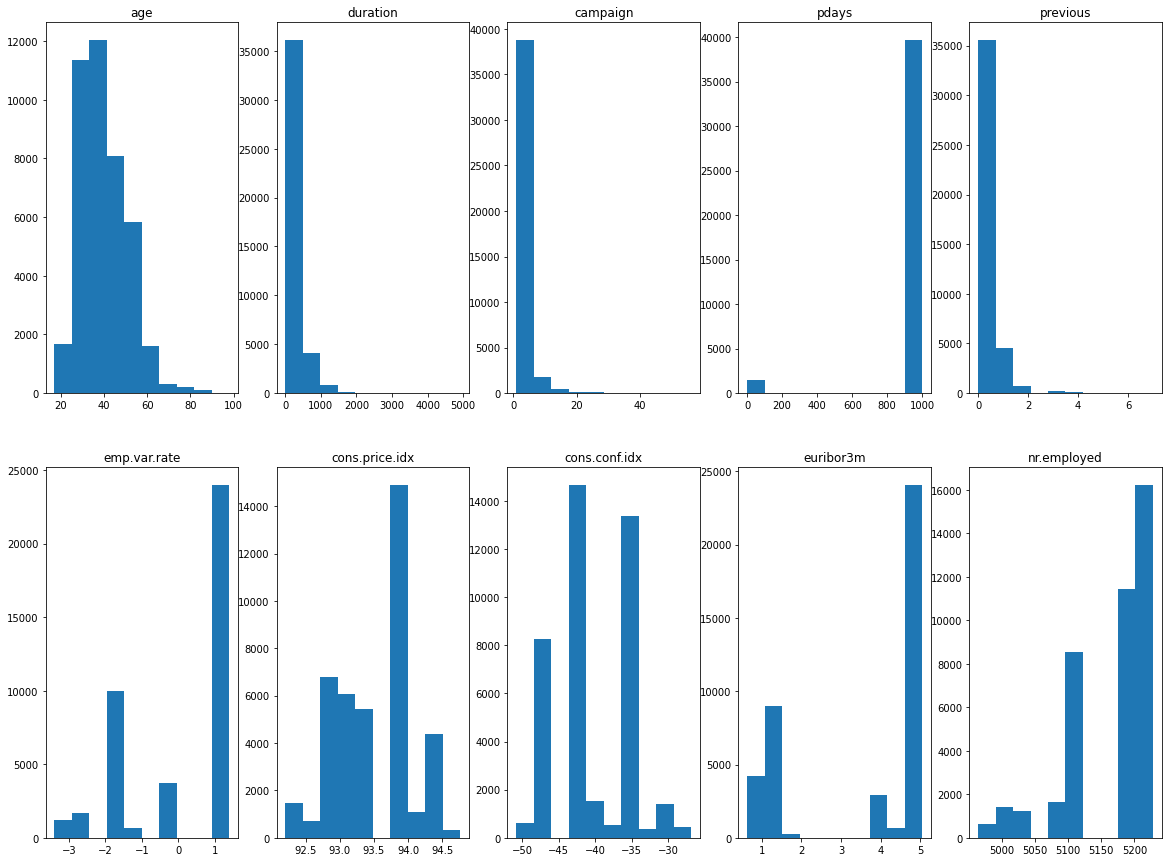

In [13]:
fig , axis = plt.subplots(2, 5, sharex=False, sharey=False, figsize=(20, 15))

flag = 0

for i in num_cols:
    
    trace_x = flag // 5
    trace_y = flag % 5
    
    axis[trace_x, trace_y].hist(data[i])

    axis[trace_x, trace_y].set_title(i)
    
    
    flag += 1

plt.show()

# Fitting the model

We have used OneHotEncoding to encode the categorical features. Because these are not ordinal features, rather nominal features, we have used OHE. 

In [14]:
categorical_transformer = OneHotEncoder(sparse = False, handle_unknown = 'ignore')

pre_process = ColumnTransformer(
    remainder = 'passthrough', transformers = [('drop_columns', 'drop', ['default']),
                                               ('cat', categorical_transformer, cat_col)]) 



We have user different parameters, among which n_estiator=100, max_depth =10 is showing best results. 

In [15]:
from sklearn.tree import DecisionTreeClassifier

model_pipeline = Pipeline(steps = [('pre_processing',pre_process), 
                                   ('random_forest', RandomForestClassifier(n_estimators = 100,
                                                                            random_state = 42,max_depth = 10,
                                                                            ))])

Here is how much memory is being used in fitting the Train data to the model. 

In [16]:
%load_ext memory_profiler
from memory_profiler import profile

%memit model_pipeline.fit(X_resampled,y_resampled)

peak memory: 255.34 MiB, increment: 26.86 MiB


In [17]:
y_pred = model_pipeline.predict(X_test)

Model Test 

In [18]:
new = pd.DataFrame()
new['test'] = y_test
new['pred'] = y_pred

new

,test,pred
6410,no,no
31289,no,no
8772,no,no
7749,no,no
31483,no,no
...,...,...
3669,no,no
21890,no,no
40143,yes,yes
717,no,no


Performance Measure

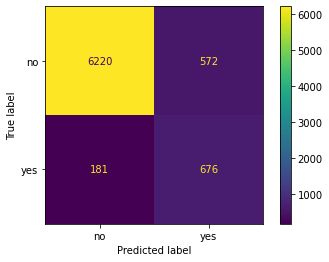

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

f = open("random_forest.txt", "w")

accuracy_score = metrics.accuracy_score(y_test, y_pred)
con_matrix = confusion_matrix(y_test,y_pred, labels=['no','yes'])
report_matrix = classification_report(y_test, y_pred,labels=['no','yes'])

L = [str(accuracy_score),"\n\n",str(con_matrix),'\n\n', str(report_matrix)] 
f.writelines(L) 
f.close()

fig = plt.figure()
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_pipeline,X_test,y_test,display_labels=['no','yes'])
plt.savefig("random_forest_confusion_matrix")
plt.close(fig)

Our main objective has been to increase the recall of 'yes' without decreasing the accuracy /Precision too much. Because we feel this particular model demands that. 

In [20]:
end = time.time()
print("Total time taken:",(end - start),"seconds")

Total time taken: 6.551722049713135 seconds
